<a href="https://colab.research.google.com/github/collegiog/RoadDetection/blob/main/Analyze_MDIRs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Análise numérica da detecção de rodovias em MDIRs

Autores: Antonio, G. G. F. e Gustavo, R. C., 2021.

FCT/UNESP

# importacao das bibliotecas

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix, completeness_score, recall_score

# leitura das imagens - data (MDIRs) e ground_true (road mask)






In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving centerline_mask_30cm_buffer_10m.tif to centerline_mask_30cm_buffer_10m.tif
Saving centerline_mask_50cm_buffer_10m.tif to centerline_mask_50cm_buffer_10m.tif
Saving skeleton_grid_03.png to skeleton_grid_03.png
Saving skeleton_grid_05.png to skeleton_grid_05.png
Saving skeleton_tin_03.png to skeleton_tin_03.png
Saving skeleton_tin_05.png to skeleton_tin_05.png
User uploaded file "centerline_mask_30cm_buffer_10m.tif" with length 3700345 bytes
User uploaded file "centerline_mask_50cm_buffer_10m.tif" with length 1332782 bytes
User uploaded file "skeleton_grid_03.png" with length 131552 bytes
User uploaded file "skeleton_grid_05.png" with length 41095 bytes
User uploaded file "skeleton_tin_03.png" with length 178358 bytes
User uploaded file "skeleton_tin_05.png" with length 64062 bytes


In [43]:
#data = (plt.imread('/content/skeleton_grid_05.png')).astype('bool')
data = (plt.imread('/content/skeleton_grid_03.png')).astype('bool')
ground_true = plt.imread('/content/centerline_mask_30cm_buffer_10m.tif')

In [44]:
ground_true = ground_true>0
ground_true

array([[ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

Necessario trabalhar com ndarray - numpy. Ambas imagens do tipo Bool

In [45]:
data.dtype

dtype('bool')

In [46]:
ground_true.dtype

dtype('bool')

# Processar imagens

separar o skeleton

In [47]:
r,g,b = data[...,0], data[...,1], data[...,2]

In [48]:
skeleton = np.bitwise_and((r>0),(g<1))
skeleton.astype('bool')

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

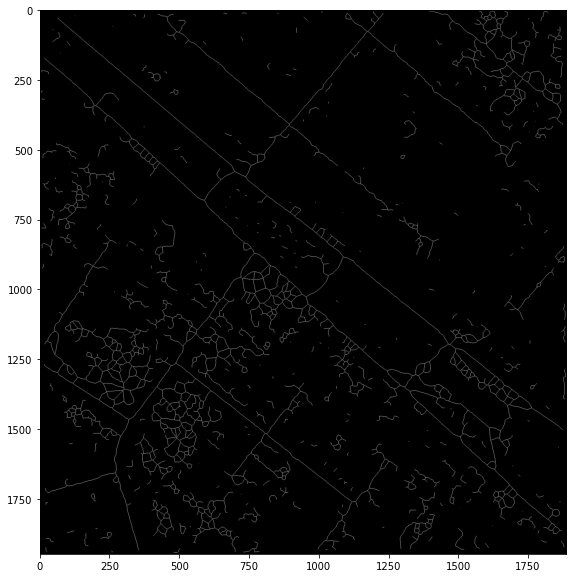

In [49]:
plt.figure(figsize=[10.0,10.0])
plt.imshow(skeleton,cmap='gray')

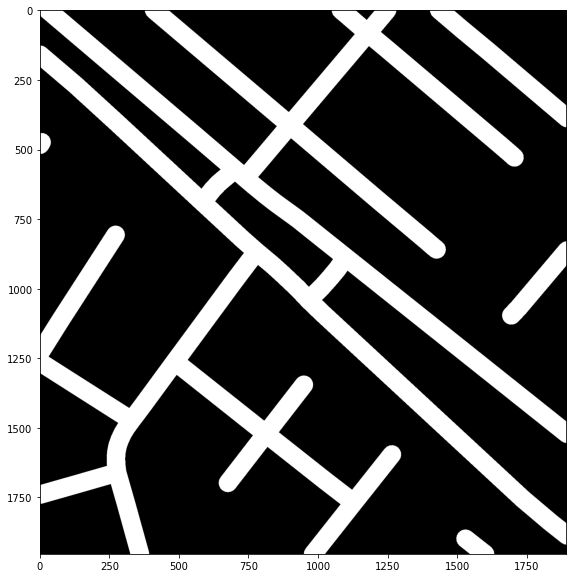

In [50]:
plt.figure(figsize=[10.0,10.0])
plt.imshow(ground_true,cmap='gray')

garantir que tenham mesmo tamanho

In [51]:
skeleton.resize(ground_true.shape[0],ground_true.shape[1],refcheck=False)

# Metrica final

**acuracia total - não usar... melhor precision e recall**

In [52]:
accuracy_score(ground_true.flatten(),skeleton.flatten())

0.7572869999126326

**ignorar macro e weighted avg**


In [53]:
print(classification_report(ground_true.flatten(),skeleton.flatten(),labels=[0,1]))

              precision    recall  f1-score   support

           0       0.76      0.99      0.86   2823633
           1       0.23      0.01      0.02    873396

    accuracy                           0.76   3697029
   macro avg       0.50      0.50      0.44   3697029
weighted avg       0.64      0.76      0.66   3697029



matriz confusão

In [54]:
confusion_matrix(ground_true.flatten(),skeleton.flatten(),labels=[0,1])

array([[2789282,   34351],
       [ 862966,   10430]])